In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def hyp_func(theta0, theta1, x):
    return theta1*x + theta0

def cost_function(x, y, theta0, theta1):
    length = len(y)
    total_error = 0.0
    for i in range(length):
        total_error += (y[i] - hyp_func(theta0,theta1,x[i]))**2
    return total_error / length


def gradDesc(x, y, theta1, theta0, learning_rate):
    theta1_deriv = 0
    theta0_deriv = 0
    length = len(x)

    for i in range(length):
        # -2x(y - (mx + b))
        theta1_deriv += -2*x[i] * (y[i] - hyp_func(theta0,theta1,x[i]))

        # -2(y - (mx + b))
        theta0_deriv += -2*(y[i] - hyp_func(theta0,theta1,x[i]))

    theta1 -= (theta1_deriv / length) * learning_rate
    theta0 -= (theta0_deriv / length) * learning_rate

    return theta1, theta0


def train(x,y,theta0,theta1,learning_rate,iters):
    cost_history = []

    for i in range(iters):
        theta1,theta0 = gradDesc(x, y, theta1, theta0, learning_rate)
        cost = cost_function(x, y, theta1, theta0)
        cost_history.append(cost)

    return theta1, theta0, cost_history


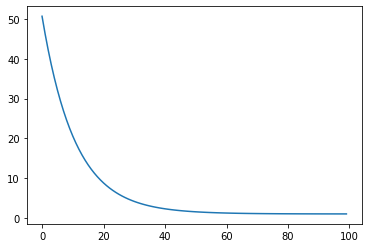

In [52]:
x = 2 * np.random.rand(100,1)
y = 4 +3 * x+np.random.randn(100,1)
theta1,theta0,cost_history = train(x,y,0,0,0.01,100)
x = [i[0] for i in x]
y = [i[0] for i in y]
plt.plot(cost_history)

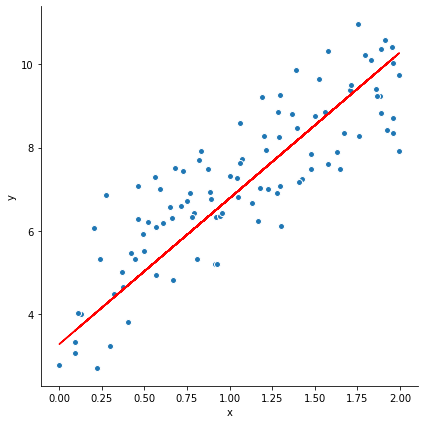

In [51]:
df = pd.DataFrame({'x':x,'y':y})
#df = pd.DataFrame(d)
g = sns.FacetGrid(df, size = 6)
g = g.map(plt.scatter, "x", "y", edgecolor="w")
y_pred = []
for i in x:
    y_pred.append(hyp_func(theta0,theta1,i))
plt.plot(x, y_pred, color='r')
plt.show()
